## Prepare retinotopy prior

For simulation, it may be a useful resource to have some idea of what pRF properties are like in different brain regions.

To this end, I prepare the retinotopy 'prior' from the Benson et al 2018 (https://elifesciences.org/articles/40224#:~:text=The%20inferred%20retinotopic%20maps%2C%20predicted,by%20combination%20with%20retinotopic%20data). Which is packaged with the neuropythy package.

This contains group averaged estimates of prf fits from the HCP dataset.

In [ ]:
%load_ext autoreload
%autoreload 2
import neuropythy as ny
import pandas as pd
import pkg_resources
import os
from pRF_sim.vis import basic_plot

subs = ny.data['benson_winawer_2018'].subjects

Here I load in variance explained, eccentricity, angle and prf size data for the averaged retinotopy outcomes.

In [43]:
import nibabel as nib
import numpy as np
wcard='/var/folders/wj/n43w35jn4b77cmr_tl630q480000gn/T/npythy_data_cache_tumyzfc7/benson_winawer_2018/retinotopy/fsaverage/{hem}_{param}.mgz'
def load_param(param):
    ldat,rdat=nib.load(wcard.format(hem='lh',param=param)),nib.load(wcard.format(hem='rh',param=param))
    return np.squeeze(np.concatenate([ldat.get_data()[0],rdat.get_data()[0]],axis=0))

In [48]:
param_names=['vexpl','eccen','angle','prfsz']
params=np.array([load_param(param) for param in param_names])

/Users/nicholashedger/anaconda2/envs/py3env/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """


In [50]:
retprior=pd.DataFrame(params.T)
retprior.columns=param_names

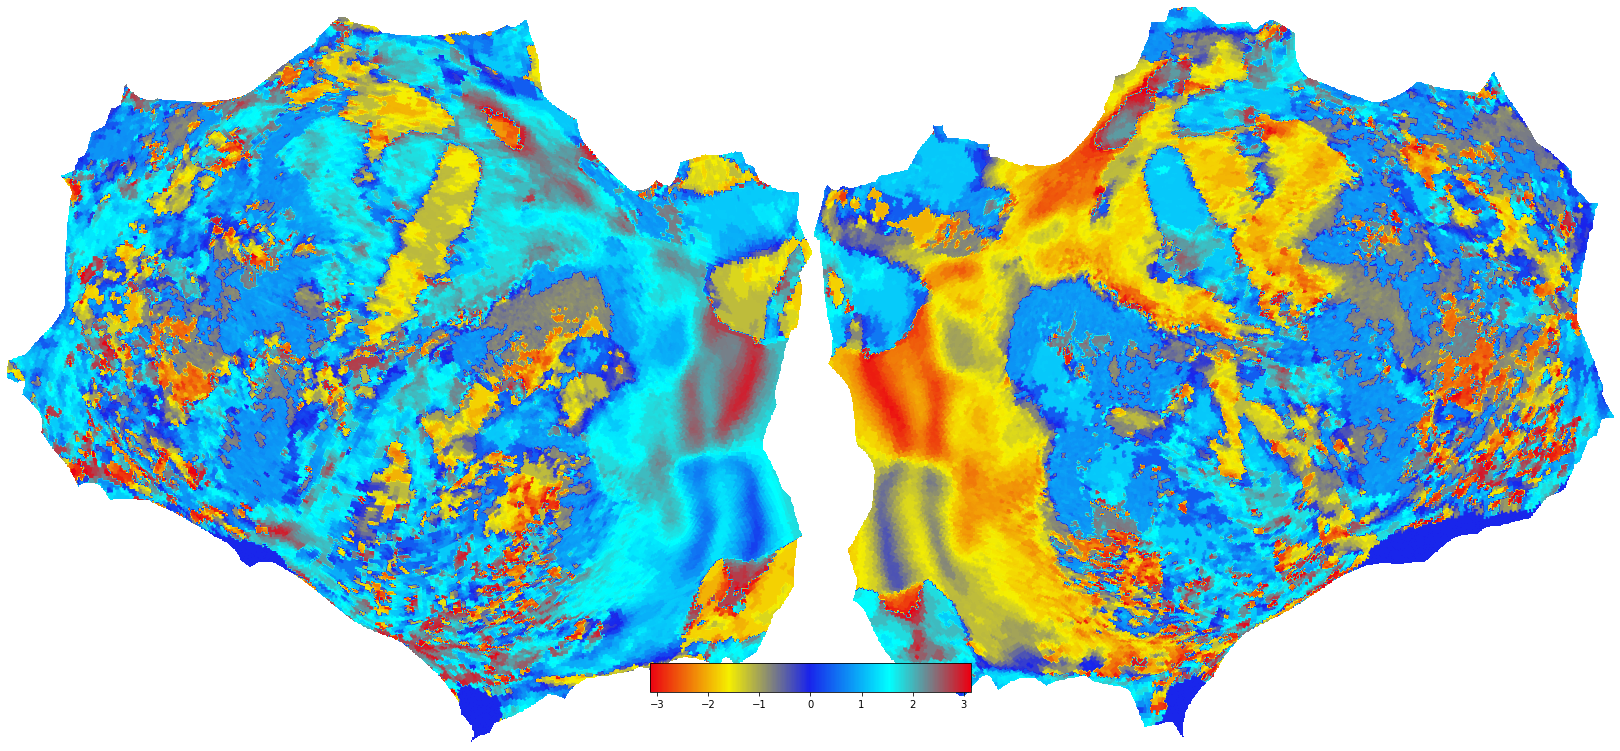

In [146]:
mp=basic_plot(np.radians(retprior['angle']),vmin=-3.14,vmax=3.14,subject='fsaverage',cmap='Retinotopy_RYBCR',colorbar=True)

I now also add a set of cartesian coordinates.

In [222]:
def convert_polar_prior(r,theta):
    
    # In prfpy, the y coordinate starts at the top of the screen.
    y = np.negative(r*np.cos(theta))
    # compute y
    x =r*np.sin(theta)
    
    return x,y 

In [215]:
x,y=mypol2cart(retprior['eccen'],np.radians((retprior['angle'])))

In [220]:
retprior['x']=x
retprior['y']=y

Check x

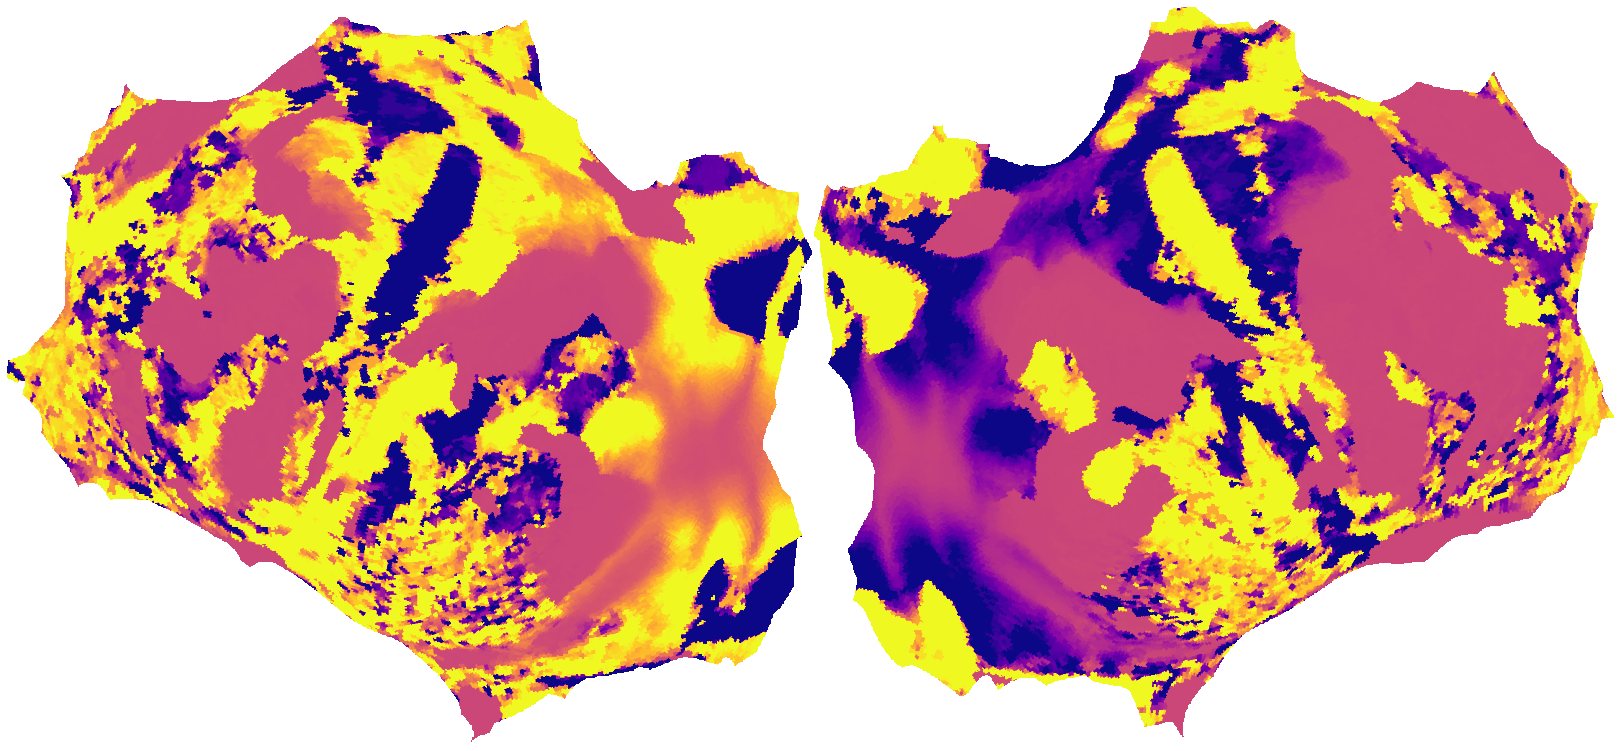

In [221]:
mp=basic_plot(retprior['x'],vmin=-5,vmax=5,subject='fsaverage')

check y

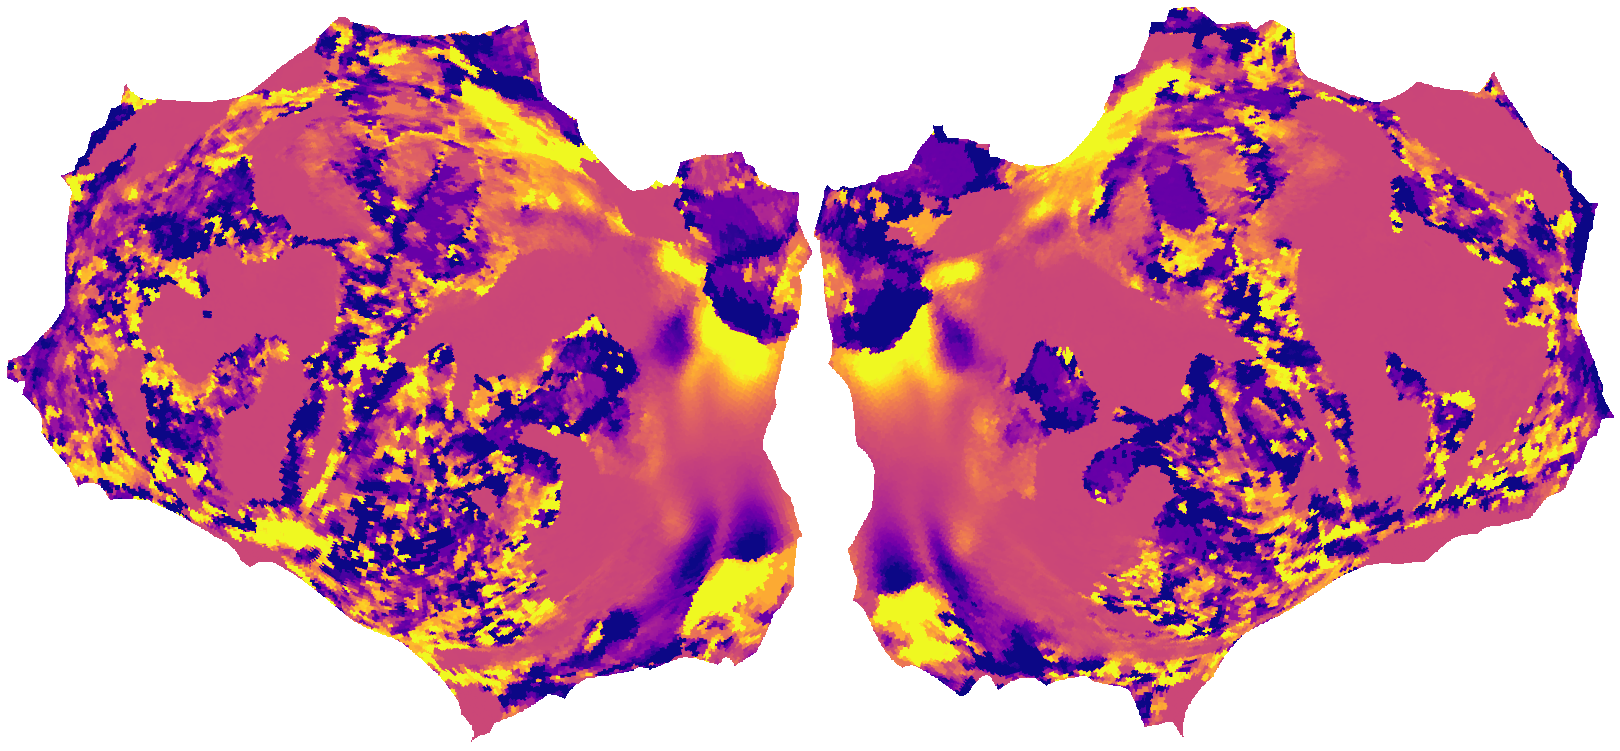

In [223]:
mp=basic_plot(retprior['y'],vmin=-5,vmax=5,subject='fsaverage')

Save this out.

In [228]:
DATA_PATH = pkg_resources.resource_filename('pRF_sim', 'test/data')
retprior.to_csv(os.path.join(DATA_PATH,'retprior.csv'))

In [ ]:
from pRF_sim.utils import load_retprior
from pRF_sim.utils import MMP_masker
retprior=load_retprior()

Using the MMP parcellation, I can now make a mask of say V4.

In [224]:
mm=MMP_masker()
V4mask=mm.make_roi_mask('V4')

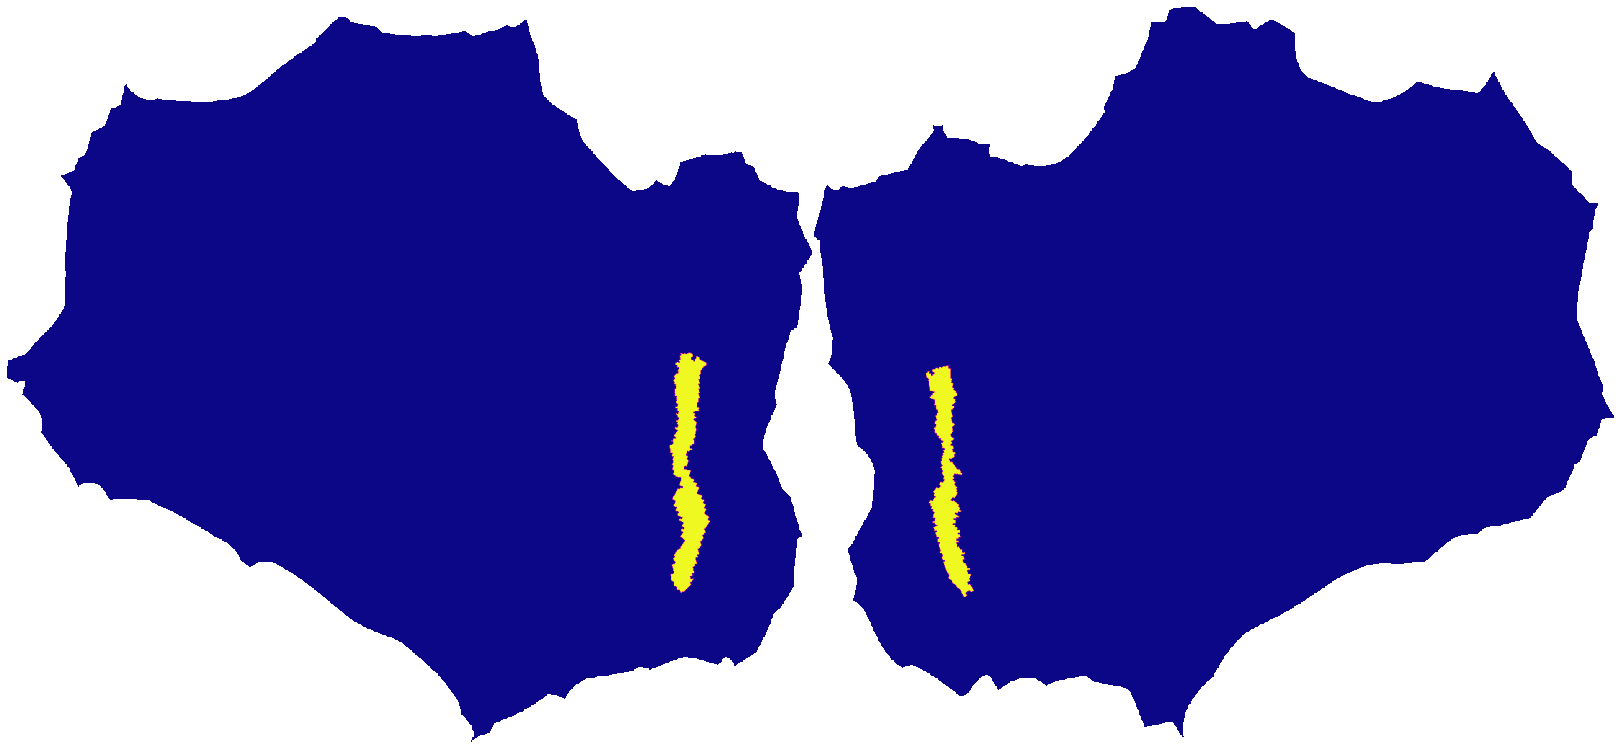

In [225]:
mp=basic_plot(V4mask[-1],vmax=1,subject='fsaverage')

And index the retinotopy prior with mask this to see what the pRF properties tend to be like in this region.

In [226]:
retprior.loc[V4mask[-1]]

,Unnamed: 0,vexpl,eccen,angle,prfsz,x,y
6,6,0.830376,0.718246,106.227110,0.619310,0.689632,0.200711
136,136,0.797547,2.781603,139.896790,0.962592,1.791815,2.127607
158,158,0.599648,5.471581,56.448380,3.311635,4.559951,-3.024077
208,208,0.779416,0.611634,109.291626,0.625067,0.577290,0.202070
306,306,0.635273,4.825347,64.769590,2.471108,4.365014,-2.056850
...,...,...,...,...,...,...,...
325968,325968,0.705102,4.002659,-101.230270,1.824165,-3.926018,0.779528
325971,325971,0.713563,3.842830,-110.652560,1.765538,-3.595876,1.355367
325972,325972,0.730975,3.181813,-106.690570,1.203063,-3.047763,0.913826
325973,325973,0.730975,3.181813,-106.690570,1.203063,-3.047763,0.913826
